## Import Libraries 

In [2]:
import pandas as pd

import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)


from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt



import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Alternatively, you can ignore specific types of warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data

In [4]:
# Load the data
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Check for missing data 

In [8]:
train.isnull().sum().any()

False

In [9]:
test.isnull().sum().any()

False

# visualize number of targets

In [11]:
label_counts = train['label'].value_counts()

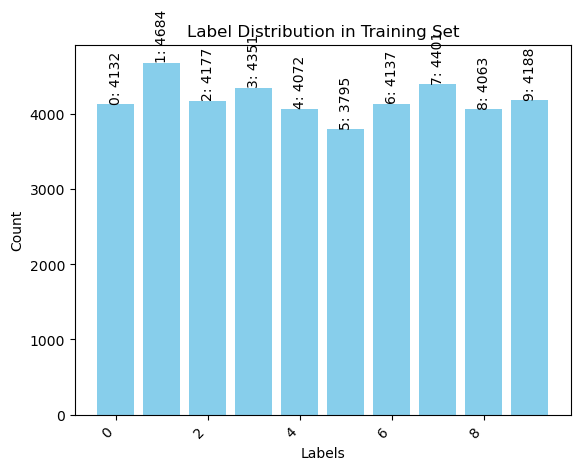

In [12]:
fig, ax = plt.subplots()

# Bar plot
bars = ax.bar(label_counts.index, label_counts.values, color='skyblue')

# Adding labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Labels')
ax.set_title('Label Distribution in Training Set')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# Annotate each bar with label names and counts
for bar, label, count in zip(bars, label_counts.index, label_counts.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}: {count}', 
            ha='center', va='bottom', rotation=90)

plt.show()

# Target and Features 

In [14]:
X = train.drop(['label'] , axis = 1)
y = train['label']

# Normalization

In [16]:
# Normalize the data
X = X / 255.0
test = test / 255.0

# Reshape 

In [18]:
# Reshape the original datasets to the required dimensions
# Assuming X_train and test are already NumPy arrays
X = X.values.reshape(-1, 28, 28, 1)  # Reshape training data to (num_samples, height, width, channels)
test = test.values.reshape(-1, 28, 28, 1)  # Reshape testing data to (num_samples, height, width, channels)

# Optionally, print the shapes to confirm the reshaping was successful
print("Training data shape:", X.shape)  # Print the shape of the training data
print("Test data shape:", test.shape)    # Print the shape of the test data

Training data shape: (42000, 28, 28, 1)
Test data shape: (28000, 28, 28, 1)


# Encoding

In [20]:
# Convert the integer label into one-hot encoded format,
# where each label is represented as a binary vector.
y = tf.keras.utils.to_categorical(y)

# Train test split

In [22]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

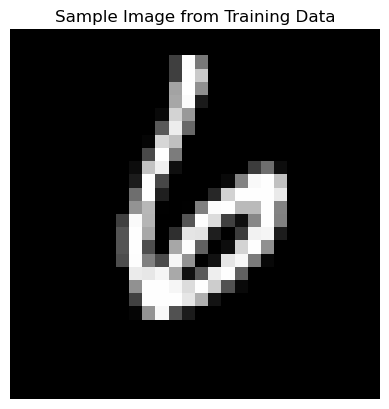

In [24]:
# Assuming visualizing the first image
sample_image = X_train[0].reshape(28, 28)  # Reshape if needed for display
plt.imshow(sample_image, cmap='gray')       # Use cmap='gray' for grayscale images
plt.axis('off')                              # Hide axis
plt.title('Sample Image from Training Data')
plt.show()

# Model 

In [56]:
input_size = 784
output_size = 10
hidden_layer_size = 50

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),  # Max pooling layer
    tf.keras.layers.Flatten(),  # Flatten the output
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),  # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),  # 2nd hidden layer
    tf.keras.layers.Dense(output_size, activation='softmax')  # Output layer
])

### Choose the optimizer and the loss function

In [58]:
# Define the optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Data Augmentation

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Training

In [66]:
# Train with EarlyStopping callback
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, y_test),
           callbacks=[early_stop, learning_rate_reduction])

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7068 - loss: 0.9112 - val_accuracy: 0.9599 - val_loss: 0.1352 - learning_rate: 0.0010
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9297 - loss: 0.2250 - val_accuracy: 0.9706 - val_loss: 0.0975 - learning_rate: 0.0010
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9475 - loss: 0.1722 - val_accuracy: 0.9779 - val_loss: 0.0696 - learning_rate: 0.0010
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9559 - loss: 0.1424 - val_accuracy: 0.9775 - val_loss: 0.0751 - learning_rate: 0.0010
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9600 - loss: 0.1263 - val_accuracy: 0.9756 - val_loss: 0.0800 - learning_rate: 0.0010
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9655 - loss: 0.1125 - val_accuracy: 0.9833 - val_loss: 0.0570 - learning_rate: 0.0010
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accura

# Evaluate the model

In [68]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

263/263 - 1s - 3ms/step - accuracy: 0.9889 - loss: 0.0350
Test Loss: 0.035029854625463486
Test Accuracy: 0.9889285564422607


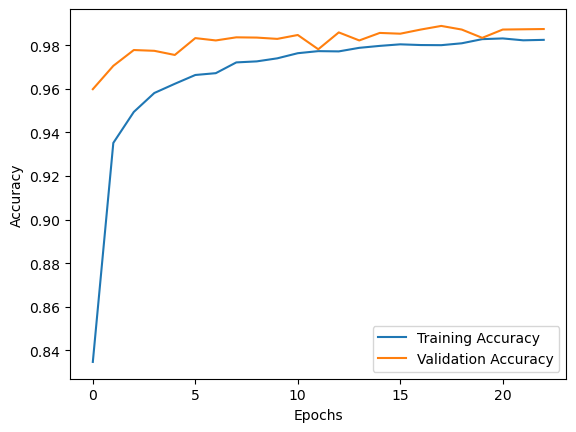

In [70]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict new data

In [74]:
# Ensure it is preprocessed and reshaped similarly to your training data
predictions = model.predict(test)

# For classification models, use argmax to get the predicted class
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted Classes:", predicted_classes)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Predicted Classes: [2 0 9 ... 3 9 2]


# Submission

In [76]:
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_classes) + 1),
    "Label": predicted_classes
})
submission.to_csv("submission.csv", index=False)